In [ ]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

In [ ]:
def MMC(config, energy, t):
  # print(N,beta[t])
  flip_idx = random.randint(0,N)
  spin = config[flip_idx]
  energy_prime = 0
  # print("idx: ",flip_idx)
  if flip_idx != 0 and flip_idx != N-1: energy_prime = spin * ( 2*config[flip_idx-1] + 2*config[flip_idx+1] )
  elif flip_idx == 0: energy_prime = spin * (2*config[flip_idx+1])
  else: energy_prime = spin * (2*config[flip_idx-1])

  if np.exp(-beta[t]*energy_prime) > random.uniform(0, 1):
    config[flip_idx] = -spin
    energy += energy_prime

  return config, energy

In [271]:
N = 1000
T = np.arange(0.2,4.1,0.2)
beta = 1/T
N_sample = 1000000
N_relax = int(N_sample)
time_step = np.shape(T)[0]

In [272]:
statistic_energy = np.zeros(time_step)
statistic_specific_heat = np.zeros(time_step)

for t in range(time_step):
  # init config
  config = np.ones(N)
  for i in range(N):
    if random.randint(0,2) == 0: config[i] = -1
  # print(config)
  # simulation
  energy = 0

  # calculate initial energy
  for i in range(N-1):
    energy -= config[i] * config[i+1]
  # print("init energy: ",energy)
  # relax
  for i in range(N_relax):
    config,energy = MMC(config,energy,t)
  # print("relaxed energy: ", energy)
  # sampling
  for i in range(N_sample):

    config,energy = MMC(config,energy,t)
    # print("sample energy: ",energy)
    statistic_energy[t] += energy
    statistic_specific_heat[t] += energy**2

  # print(statistic_specific_heat[t]/N_sample)
  statistic_energy[t] /= N_sample

  # print("avg U^2 per sample: ",statistic_energy[t]**2)
  statistic_specific_heat[t] = (statistic_specific_heat[t]/N_sample - statistic_energy[t]**2) * (beta[t]**2)
  # print("avg C per sample: ",statistic_specific_heat[t])

statistic_specific_heat /= N
statistic_energy /= N

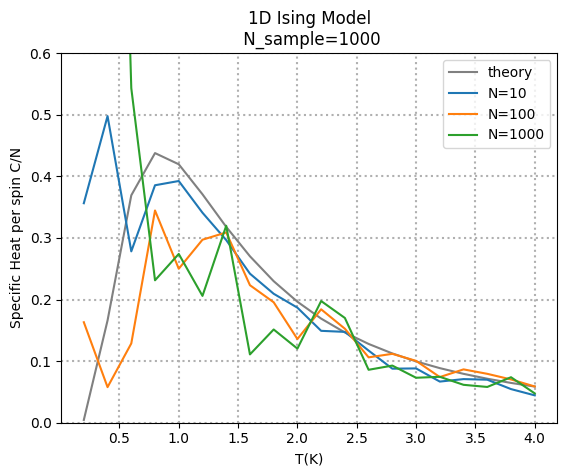

In [277]:
# C_12 C_12_2 C_21 C_22 C_31 C_32 C_33
# C_31 = statistic_specific_heat
# E_31 = statistic_energy

# plt.plot(T,-(N-1)/N * np.tanh(beta),label='theory',color="grey")
# plt.plot(T,E_12,label='N=10')
# plt.plot(T,E_22,label='N=100')
# plt.plot(T,E_33,label='N=1000')
# # plt.ylim(0,0.6)
# plt.title("1D Ising Model\n N_sample=1000")
# plt.xlabel("T(K)")
# plt.ylabel("Internal Energy per spin U/N")
# plt.grid(linestyle = "dotted", linewidth = 1.5)

plt.plot(T,(N-1)/N * (beta/(np.cosh(beta)))**2,label='theory',color="grey")
plt.plot(T,C_12,label='N=10')
plt.plot(T,C_22,label='N=100')
plt.plot(T,C_33,label='N=1000')
plt.ylim(0,0.6)
plt.title("1D Ising Model\n N_sample=1000")
plt.xlabel("T(K)")
plt.ylabel("Specific Heat per spin C/N")
plt.grid(linestyle = "dotted", linewidth = 1.5)

plt.legend()
plt.show()